# By Zeal Jinwala
# Date: January 30, 2022
# Data Source: The Illumina and nanopore sequence datasets of the nose swab samples, generated and analyzed
#               in the current study, are available in the European Nucleotide Archive (ENA) under accession number
#               PRJEB28612. https://www.ebi.ac.uk/ena/browser/view/PRJEB28612?show=reads 


In [65]:
import pandas as pd
import matplotlib.pyplot as plt 

In [66]:
# input Nanopore Seq Data
# read input
def fasta_readfirst(file):
    from Bio import SeqIO
    df = pd.DataFrame(columns=['IDs', 'Seqs'])
    for record in SeqIO.parse(file, "fastq"):
        df = df.append({'IDs': record.id, 'Seqs': record.seq}, ignore_index=True)
    return df

# Read Length Distribution

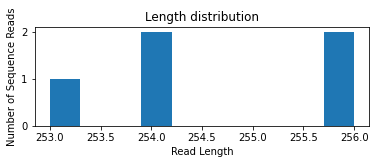

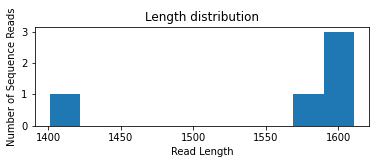

In [67]:
fileIllumina = "/Users/zsj24/GitHub/Computational-Analysis/sampleIllumina.fastq"
fileNanopore = "/Users/zsj24/GitHub/Computational-Analysis/sampleNanopore.fastq"
dfIllumina = fasta_readfirst(fileIllumina)
dfNanopore = fasta_readfirst(fileNanopore)
readLengthsIL = dfIllumina['Seqs'].str.len()
plt.subplot(2, 1, 1)
plt.hist(readLengthsIL)
plt.xlabel("Read Length")
plt.ylabel('Number of Sequence Reads')
plt.title('Length distribution')
plt.show()
readLengthsNP = dfNanopore['Seqs'].str.len()
plt.subplot(2, 1, 2)
plt.hist(readLengthsNP)
plt.xlabel("Read Length")
plt.ylabel('Number of Sequence Reads')
plt.title('Length distribution')
plt.show()

# Quality score distribution 